In [1]:
import face_recognition
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:

def img_encoding(imagePath):
    knownEncodings = []
    knownNames = []

    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input image
    boxes = face_recognition.face_locations(rgb,model='cnn')

    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)

    # loop over the encodings
    for encoding in encodings:
        # add each encoding + name to our set of known names and
        # encodings
        knownEncodings.append(encoding)
        # knownNames.append(name)
    return knownEncodings

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [3]:
database = {}

In [4]:
%%time
img_encoding('../data/ashish_lal/00000000.jpg')[0]

CPU times: user 1.85 s, sys: 348 ms, total: 2.2 s
Wall time: 2.19 s


array([-0.11906605,  0.06042315,  0.03999961, -0.07101926, -0.02438905,
       -0.06090312, -0.03099481, -0.09260668,  0.10354632, -0.08234384,
        0.19559199, -0.0821338 , -0.26187494, -0.08381651, -0.03417161,
        0.12250533, -0.18910545, -0.12652382, -0.05787651, -0.13229579,
       -0.00635741, -0.02692076,  0.02919697,  0.0037265 , -0.06654888,
       -0.31118837, -0.12318327, -0.12374661,  0.05922926, -0.06418545,
       -0.03512703,  0.04633465, -0.14849538, -0.0523    ,  0.04121337,
        0.1042617 ,  0.01698582,  0.00677797,  0.19168188,  0.01169818,
       -0.09599848, -0.04016811,  0.05781714,  0.26834464,  0.16584206,
        0.11184729, -0.02858311, -0.07833082,  0.05622244, -0.17794859,
        0.0889475 ,  0.16546831,  0.06647725,  0.04251702,  0.08123517,
       -0.12924407,  0.01364993,  0.04985411, -0.14986189, -0.00411498,
        0.05154664, -0.09545411, -0.09054986, -0.05624812,  0.23190738,
        0.10924862, -0.08406224, -0.16038282,  0.23241989, -0.13

In [5]:
database

{}

In [6]:
%%time
database['ashish_lal'] = img_encoding('../data/ashish_lal/00000000.jpg')[0]
database['alan_grant'] = img_encoding('../data/alan_grant/00000000.jpg')[0]
database['ivan_mihalj'] = img_encoding('../data/ivan_mihalj/00000000.jpg')[0]

CPU times: user 1.05 s, sys: 36 ms, total: 1.09 s
Wall time: 1.07 s


In [7]:
os.listdir('../data')

['alan_grant', 'ashish_lal', 'ivan_mihalj']

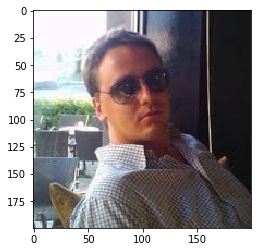

In [69]:
img = cv2.imread('../data/ivan_mihalj/00000000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

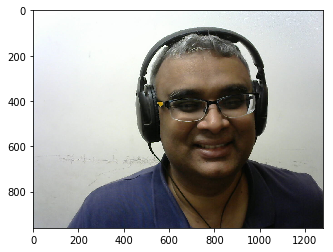

In [50]:
img1 = cv2.imread('../data/ashish_lal/00000000.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

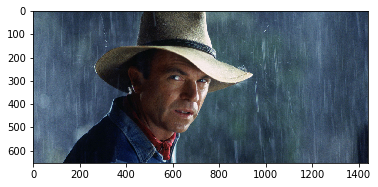

In [29]:
img2 = cv2.imread('../data/alan_grant/00000000.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [30]:
%%time
face_recognition.face_locations(img1, model='hog')

CPU times: user 948 ms, sys: 16 ms, total: 964 ms
Wall time: 958 ms


[(297, 1016, 759, 553)]

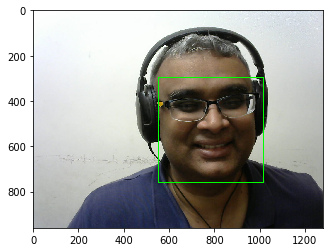

In [51]:
pts1 = (1016,297)
pts2 = (553,759)
img1 = cv2.rectangle(img1, pts1, pts2,color=(0, 255, 0), thickness=2)
plt.imshow(img1)

In [31]:
%%time
face_recognition.face_locations(img, model='hog')

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 50.3 ms


[]

In [66]:
%%time
face_recognition.face_locations(img, model='cnn')

CPU times: user 24 ms, sys: 12 ms, total: 36 ms
Wall time: 28.7 ms


[(42, 133, 110, 65)]

In [67]:
%%time
face_recognition.face_locations(img, model='cnn')

CPU times: user 16 ms, sys: 12 ms, total: 28 ms
Wall time: 27.4 ms


[(42, 133, 110, 65)]

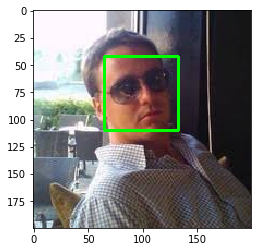

In [70]:
pts1 = (133,42)
pts2 = (65,110)
img = cv2.rectangle(img, pts1, pts2,color=(0, 255, 0), thickness=2)
plt.imshow(img)

In [ ]:
#detecting multiple faces

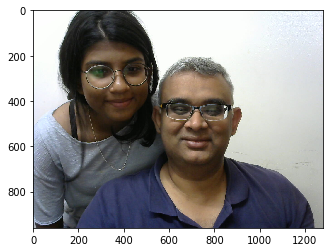

In [61]:
img3 = cv2.imread('../data/test/2019-01-15-230310.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

In [58]:
%%time
face_recognition.face_locations(img3, model='hog')

CPU times: user 996 ms, sys: 28 ms, total: 1.02 s
Wall time: 1.02 s


[(170, 526, 491, 205), (348, 883, 669, 562)]

In [59]:
%%time
face_recognition.face_locations(img3, model='cnn')

CPU times: user 232 ms, sys: 44 ms, total: 276 ms
Wall time: 255 ms


[(162, 537, 455, 243), (333, 885, 685, 533)]

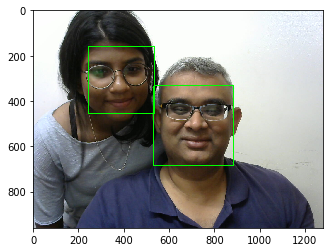

In [62]:
pts1 = (537,162)
pts2 = (243,455)
pts3 = (885,333)
pts4 = (533,685)
img3 = cv2.rectangle(img3, pts1, pts2,color=(0, 255, 0), thickness=3)
img3 = cv2.rectangle(img3, pts3, pts4,color=(0, 255, 0), thickness=3)
plt.imshow(img3)

In [32]:
%%time
face_recognition.face_locations(img2, model='hog')

CPU times: user 744 ms, sys: 4 ms, total: 748 ms
Wall time: 746 ms


[]

In [20]:
face_recognition.face_locations(img,model='cnn')

[(52, 122, 109, 65)]

In [33]:
face_recognition.face_locations(img1,model='cnn')

[(287, 977, 710, 554)]

In [34]:
face_recognition.face_locations(img2,model='cnn')

[(195, 752, 489, 459)]

In [81]:
database['ivan_mihalj'] = img_encoding('../data/ivan_mihalj/00000000.jpg')[0]
database['alan_grant'] = img_encoding('../data/alan_grant/00000000.jpg')[0]

In [82]:
%%time
enc1 = img_encoding('../data/ashish_lal/00000001.jpg')[0]

CPU times: user 316 ms, sys: 4 ms, total: 320 ms
Wall time: 314 ms


In [83]:
%%time
enc2 = img_encoding('../data/test/2019-01-15-230310.jpg')

CPU times: user 244 ms, sys: 40 ms, total: 284 ms
Wall time: 275 ms


In [87]:
%%time
print(findEuclideanDistance(enc1, enc1))
print(findEuclideanDistance(enc1, database['ashish_lal']))
print(findEuclideanDistance(enc1, database['ivan_mihalj']))
print(findEuclideanDistance(enc1, database['alan_grant']))

0.0
0.3617297113711618
0.7108792102036539
0.799418771947807
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 552 µs


In [88]:
print(findCosineSimilarity(enc1, enc1))
print(findCosineSimilarity(enc1, database['ashish_lal']))
print(findCosineSimilarity(enc1, database['ivan_mihalj']))
print(findCosineSimilarity(enc1, database['alan_grant']))

0.0
0.03926930535545792
0.13675468840499727
0.16238160133150237


In [86]:
%%time
print(findEuclideanDistance(enc2[0], database['ashish_lal']))
print(findEuclideanDistance(enc2[0], database['ivan_mihalj']))
print(findEuclideanDistance(enc2[0], database['alan_grant']))
print('----------------')
print(findEuclideanDistance(enc2[1], database['ashish_lal']))
print(findEuclideanDistance(enc2[1], database['ivan_mihalj']))
print(findEuclideanDistance(enc2[1], database['alan_grant']))

0.6734598990317785
0.71007935718561
0.9156094567451029
----------------
0.23113180409028616
0.7040942379266357
0.8077384797387023
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 906 µs
